# COMP4328/5328/8328 - Advanced Machine Learning

## Tutorial - Matrix factorization

**Semester 2, 2025**

**Objectives:**

* To understand the algorithm of matrix factorization (MF).
* To understand the algorithm of non-negtive matrix factorization (MF).

**Instructions:**

* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "week5_tutorial.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "week5_tutorial.ipynb" file
* Complete exercises in "week5_tutorial.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Scikit-learn library is installed within Anaconda.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.

Lecturers: Tongliang Liu

## 1. Matrix Factorization (MF)

We want to solve the following matrix factorization problem:
\begin{equation}
\mathbf{R} \approx \mathbf{P} \times \mathbf{Q}^T = \hat{\mathbf{R}}
\end{equation}
Element in the original matrix is then estimated via
\begin{equation}
\hat{r_{ij}} = p_i^T q_j = \sum_{k=1}^K p_{ik} q_{kj}
\end{equation}
Here let us first consider a gradient descent optimization method:

In an online fashion, we optimize the following reconstruction error with regularization
\begin{equation}
e_{ij}^2 = (r_{ij}-\sum_{k=1}^K p_{ik} q_{kj})^2 + \frac{\beta}{2} \sum_{k=1}^K ({p_{ik}}^2+{q_{kj}}^2)
\end{equation}
The gradient descent update rules are as follows
\begin{equation}
p_{ik}' = p_{ik}-\alpha \frac{\partial}{\partial p_{ik}}e_{ij}^2 = p_{ik}+\alpha(2(r_{ij}-\sum_{l=1}^K p_{il} q_{lj})q_{kj}-\beta p_{ik})
\end{equation}

\begin{equation}
q_{kj}' = q_{kj}-\alpha \frac{\partial}{\partial q_{kj}}e_{ij}^2 = q_{kj}+\alpha(2(r_{ij}-\sum_{l=1}^K p_{il} q_{lj})p_{ik}-\beta q_{kj})
\end{equation}

In [ ]:
import numpy as np
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from time import time
from skimage.transform import resize
%matplotlib notebook


Bad key text.latex.unicode in file I:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file I:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key nbagg.transparent in file I:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 426 ('nbagg.transparent: True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlib

** Define a matrix factorization function **

** Input:**

* $\mathbf{R}$: the matrix to be factorized, dimension $N \times M$
* $\mathbf{P}$: an initial matrix of dimension $N \times K$
* $\mathbf{Q}$: an initial matrix of dimension $M \times K$
* $K$: the number of latent features
* steps: the maximum number of steps to perform the optimisation
* alpha: the learning rate
* beta: the regularization parameter

** Output:**
* the final matrices $\mathbf{P}$ and $\mathbf{Q}$

In [ ]:
def matrix_factorization(R, P, Q, K, steps=500, alpha=0.002, beta=0.02):
    Q = Q.T
    for step in range(steps):
        e = (R - P@Q)
        P = P + alpha*(2*e@Q.T - beta*P)
        Q = Q + alpha*(2*P.T@e - beta*Q)
    return P, Q.T

Enter the matrix we want to factorize:

In [ ]:
# Preprocessing of face data

# Load faces data
faces = fetch_olivetti_faces()
print(faces.DESCR)
images_faces = faces['images']
data_faces = faces.data
# The number and size of images
print('image size:\n',images_faces.shape,'\nimage data size:\n',data_faces.shape)
# Note that data are stored as design matrix

# Use a subsample for training and resize images to be 16x16
number_of_train = 100
images_faces_train = images_faces[:number_of_train,:,:]
images_faces_train = np.transpose(resize(np.transpose(images_faces_train,[1,2,0]),[16,16]),[2,0,1])
data_faces_train = data_faces[:number_of_train,:]
data_faces_train = np.transpose(resize(np.transpose(data_faces_train.reshape(number_of_train,64,64),[1,2,0]),[16,16]),[2,0,1])
data_faces_train = data_faces_train.reshape(number_of_train,-1)

n_samples = len(images_faces_train)
image_shape = images_faces_train[0].shape

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

<IPython.core.display.Javascript object>


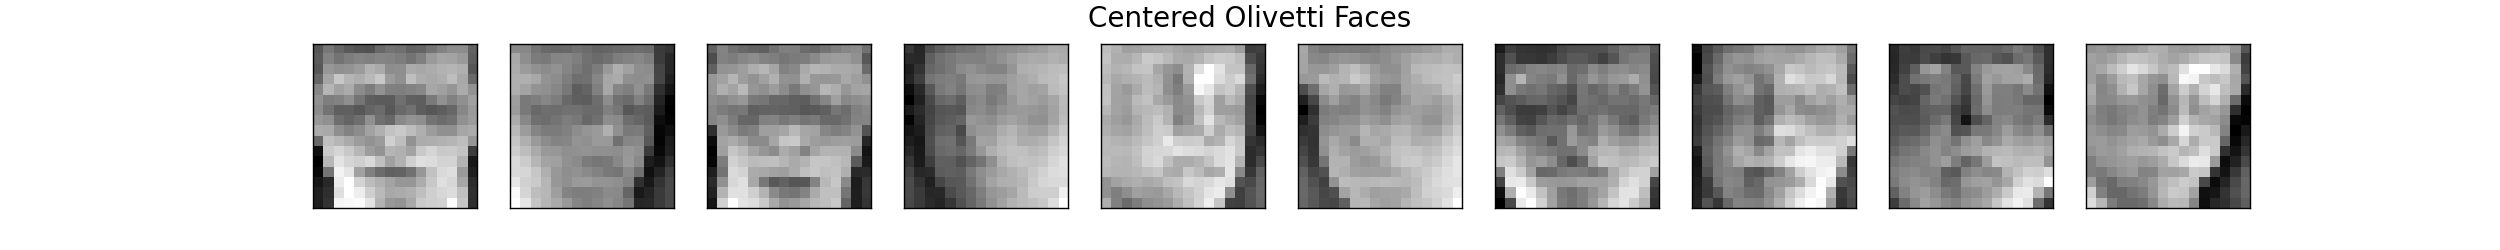

In [ ]:
# global centering

data_faces_centered = data_faces_train - data_faces_train.mean(axis=0)

# local centering
data_faces_centered -= data_faces_centered.mean(axis=1).reshape(n_samples, -1)

# Let's show some centered faces
plt.figure(figsize=(20, 2))
plt.suptitle("Centered Olivetti Faces", size=16)
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data_faces_centered[i].reshape(image_shape), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    
R = data_faces_centered

Test the MF function:

<IPython.core.display.Javascript object>


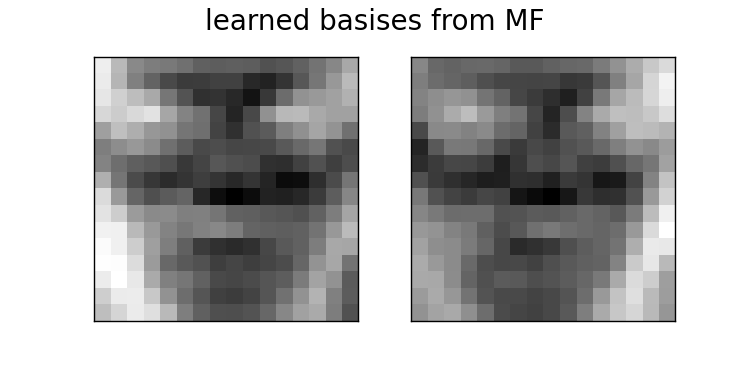

In [ ]:
N = len(R)
M = len(R[0])
K = 2

# initialize 
rng = np.random.RandomState(1)
P = rng.rand(N,K)
Q = rng.rand(M,K)

# run new function
P_estimate, Q_estimate = matrix_factorization(R, P, Q, K, steps=5000, alpha=0.002)

#show the learned basis
plt.figure(figsize=(6, 3))
plt.suptitle("learned basises from MF", size=16)
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.imshow(Q_estimate[:,i].reshape(16,16), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())


The learned basis right now seems not informative, this the reason why we need NMF.

In [ ]:
# show the reconstruction error
R - P_estimate.dot(Q_estimate.T)

array([[-0.11072177, -0.05205961, -0.08352203, ...,  0.17152836,
         0.07815962, -0.19043068],
       [-0.20200744, -0.15811749, -0.11154252, ..., -0.09944119,
        -0.01904339,  0.03707301],
       [-0.11015527, -0.03365081, -0.06866932, ..., -0.05731727,
        -0.214807  , -0.17055853],
       ...,
       [ 0.10432226,  0.07764721,  0.02616917, ..., -0.06707691,
        -0.19764834, -0.21199416],
       [ 0.07002051,  0.19810711,  0.08615922, ..., -0.05898211,
        -0.10663504, -0.01754183],
       [-0.01028435, -0.00221627, -0.03962596, ..., -0.1547927 ,
        -0.19334075, -0.20317782]])

** Exercise: **

For non-negtive matrix factorization, try multiplicative update rule:
\begin{equation}
\mathbf{P}_{ij} = \mathbf{P}_{ij} \frac{(\mathbf{R}\mathbf{Q})_{ij}}{(\mathbf{P}\mathbf{Q}^T\mathbf{Q})_{ij}}
\end{equation}

\begin{equation}
\mathbf{Q}^T_{ij} = \mathbf{Q}^T_{ij} \frac{(\mathbf{P}^T\mathbf{R})_{ij}}{(\mathbf{P}^T\mathbf{P}\mathbf{Q}^T)_{ij}}
\end{equation}

In [ ]:
def mf_multiplicative_update(R, P, Q, steps=5000):
    for step in range(steps):
        # To do here
        Pu = P*(R.dot(Q))/(P.dot(Q.T).dot(Q))+1e-7
        Qu = (Q.T*(Pu.T.dot(R))/(Pu.T.dot(Pu).dot(Q.T))).T+1e-7
        
        e_P = np.sqrt(np.sum((Pu-P)**2, axis=(0,1)))/P.size
        e_Q = np.sqrt(np.sum((Qu-Q)**2, axis=(0,1)))/Q.size
        if e_P<0.001 and e_Q<0.001:
            print("step is:",step)
            break
        P = Pu
        Q = Qu
    return P, Q

step is: 324


<IPython.core.display.Javascript object>


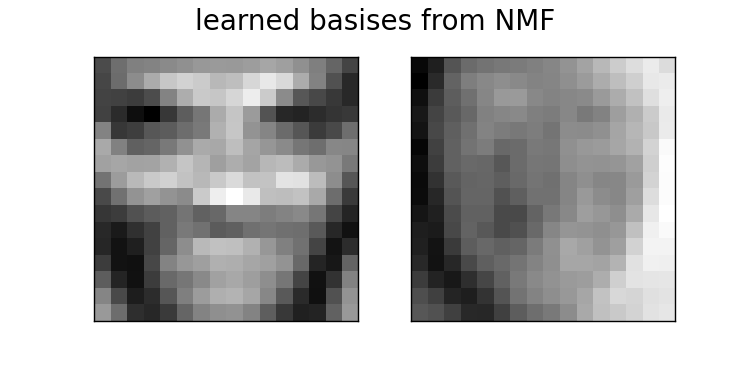

In [ ]:
rng = np.random.RandomState(1)
P = rng.rand(N,K)
Q = rng.rand(M,K)

P_estimate, Q_estimate = mf_multiplicative_update(R, P, Q)
#print(P_estimate.dot(Q_estimate.T))
plt.figure(figsize=(6, 3))
plt.suptitle("learned basises from NMF", size=16)
for i in range(K):
    plt.subplot(1, K, i+1)
    plt.imshow(Q_estimate[:,i].reshape(16,16), cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

Much more informative basis can be learned from NMF.

In [ ]:
#show the reconstruction error
R - P_estimate.dot(Q_estimate.T)

array([[-0.1242847 , -0.05390411, -0.08019862, ...,  0.14018954,
         0.06995695, -0.17810949],
       [-0.19618245, -0.15643957, -0.11195254, ..., -0.08963525,
        -0.01549708,  0.0348443 ],
       [-0.12869928, -0.04065488, -0.06906487, ..., -0.08213313,
        -0.22483399, -0.16658043],
       ...,
       [ 0.03898296,  0.0347184 ,  0.00462179, ..., -0.08101229,
        -0.22840887, -0.2509019 ],
       [ 0.01693038,  0.16330934,  0.0687023 , ..., -0.07055379,
        -0.13190856, -0.04943222],
       [-0.04616812, -0.0201213 , -0.04519743, ..., -0.18528897,
        -0.21165994, -0.20810752]])